In [64]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import keras

In [43]:
# (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
# train_images, test_images = train_images / 255.0, test_images / 255.0

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data() 

train_images, test_images = train_images / 255.0, test_images / 255.0

print('Shape of x_train is {}'.format(train_images.shape))
print('Shape of x_test is {}'.format(train_labels.shape))
print('Shape of y_train is {}'.format(test_images.shape))
print('Shape of y_test is {}'.format(test_labels.shape))

Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (50000, 1)
Shape of y_train is (10000, 32, 32, 3)
Shape of y_test is (10000, 1)


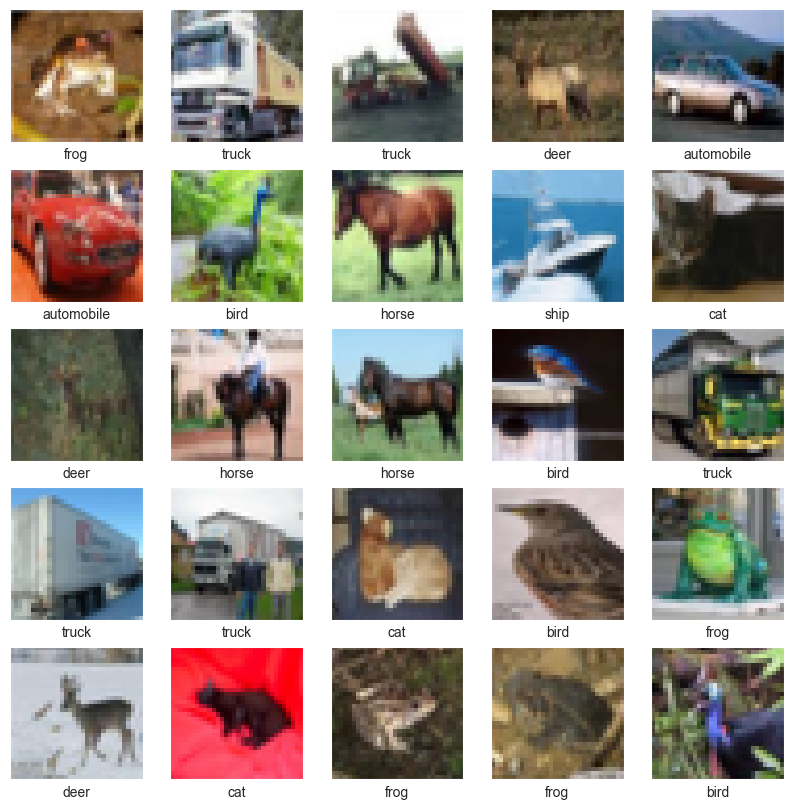

In [44]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [149]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # input shape 32x32 image with RGB (3)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)),
model.add(layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(layers.Dense(10,activation='softmax'))

adam = keras.optimizers.Adam(learning_rate=0.0001)
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# model1=Sequential()
# model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
# model1.add(MaxPool2D(pool_size=(2,2)))
# model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
# model1.add(MaxPool2D(pool_size=(2,2)))
# model1.add(Flatten())
# model1.add(Dense(256,activation='relu'))
# model1.add(Dense(10,activation='softmax'))
# model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_90 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 13, 13, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_92 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_26 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 317,258 (1.21 MB)

 Trainable params: 317,258 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [150]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, 
                    validation_data=(test_images, test_labels))

# history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.2163 - loss: 2.1038 - val_accuracy: 0.4261 - val_loss: 1.6029
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.4179 - loss: 1.5972 - val_accuracy: 0.4911 - val_loss: 1.4212
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.4858 - loss: 1.4433 - val_accuracy: 0.5415 - val_loss: 1.3215
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.5221 - loss: 1.3520 - val_accuracy: 0.5509 - val_loss: 1.2866
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.5487 - loss: 1.2818 - val_accuracy: 0.5798 - val_loss: 1.2028
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.5711 - loss: 1.2339 - val_accuracy: 0.5650 - val_loss: 1.2257
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.5879 - loss: 1.1863 - val_accuracy: 0.6051 - val_loss: 1.1464
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5976 - loss: 1.1542 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


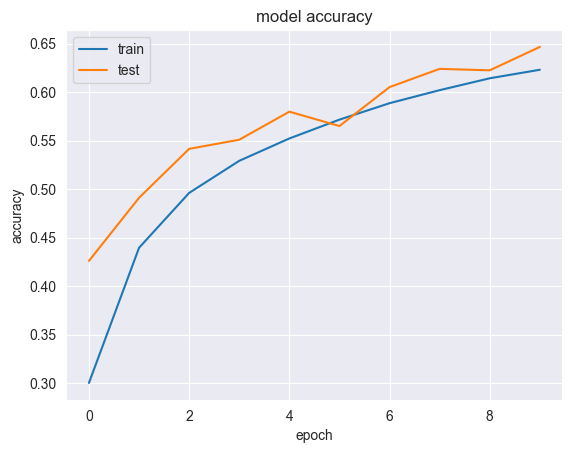

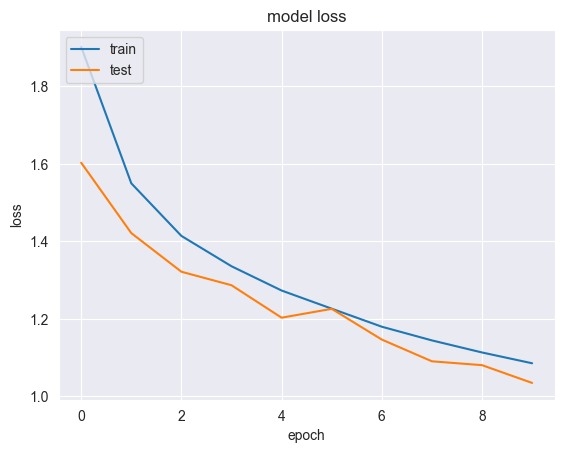

In [151]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [152]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# probability_model = tf.keras.Sequential([model,
#                                          tf.keras.layers.Softmax()])
predictions = model.predict(test_images)

print(predictions[0])
np.argmax(predictions[0])
print(test_labels[0])

313/313 - 1s - 5ms/step - accuracy: 0.6465 - loss: 1.0345

Test accuracy: 0.6464999914169312
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[0.01658702 0.00187214 0.04388762 0.65845436 0.00682034 0.20435096
 0.04972416 0.00404617 0.00990917 0.00434798]
[3]


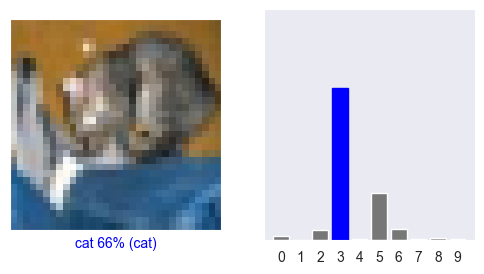

In [153]:
def plot_image(j, predictions_array, true_label, img):
    true_label, img = true_label[j], img[j]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label[0]]),
               color=color)

def plot_value_array(k, predictions_array, true_label):
    true_label = true_label[k]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

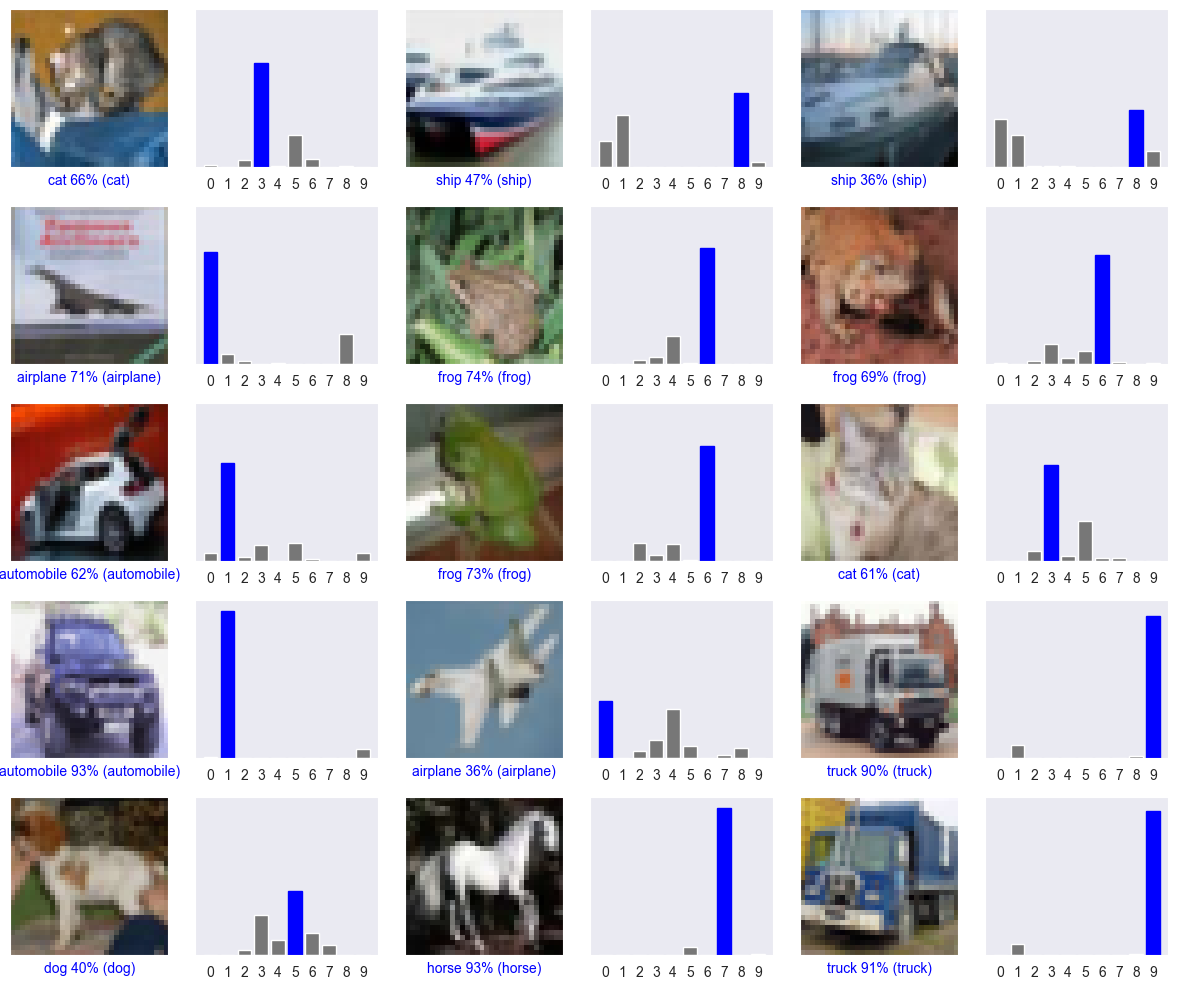

In [154]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()